# Initial kinematics distributions

**Goal:** Ok, so Michael said our goal here is that he and Rafael could tell me "make this plot", and I would be able to do it, so these first plots are really just to get familiar with the flow of the code, how to access some signal and background samples, maybe start looking into the reweighting?

But really I just want to start delving into the code and the physics by making some distribuitons.


In [1]:
from root_numpy import root2array 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.14/04


In [2]:
sigDir = "../../hh4b-resolved-reconstruction/btagStudies/"
treeName = "fullmassplane"
df_m500 = pd.DataFrame(root2array(sigDir + "M500_mv2_70.root", treeName))

In [3]:
df_m500.columns

Index(['run_number', 'event_number', 'ntag', 'njets', 'mc_sf', 'event_m_hh',
       'event_pt_hh', 'event_m_h1', 'event_E_h1', 'event_pT_h1',
       'event_eta_h1', 'event_phi_h1', 'event_m_h2', 'event_E_h2',
       'event_pT_h2', 'event_eta_h2', 'event_phi_h2', 'event_m_h1_j1',
       'event_E_h1_j1', 'event_pT_h1_j1', 'event_eta_h1_j1', 'event_phi_h1_j1',
       'event_angle_h1_j1', 'event_m_h1_j2', 'event_E_h1_j2', 'event_pT_h1_j2',
       'event_eta_h1_j2', 'event_phi_h1_j2', 'event_angle_h1_j2',
       'event_m_h2_j1', 'event_E_h2_j1', 'event_pT_h2_j1', 'event_eta_h2_j1',
       'event_phi_h2_j1', 'event_angle_h2_j1', 'event_m_h2_j2',
       'event_E_h2_j2', 'event_pT_h2_j2', 'event_eta_h2_j2', 'event_phi_h2_j2',
       'event_angle_h2_j2', 'event_tag_h1_j1', 'event_tag_h1_j2',
       'event_tag_h2_j1', 'event_tag_h2_j2', 'rwgt_pT_4', 'rwgt_pT_2',
       'rwgt_eta_i', 'rwgt_dRjj_1', 'rwgt_dRjj_2'],
      dtype='object')

## $t\bar{t}$ cutflows

Since this is my first time running over ttbar as well, I'm going to take a look at the cutflows, and it's probably also worthwhile checking my values against Beojean's and Sean's in the [cutflow twiki](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/Hh4bFullRun2CutFlowChallenge)!


In [4]:
from root_numpy import list_trees

In [5]:
list_trees(sigDir + "ttbar_allhad.root")

['sideband', 'control', 'fullmassplane', 'sig']

In [6]:
import ROOT

In [7]:
f = ROOT.TFile.Open(sigDir + "ttbar_allhad.root")

In [8]:
f.ls()

TFile**		../../hh4b-resolved-reconstruction/btagStudies/ttbar_allhad.root	
 TFile*		../../hh4b-resolved-reconstruction/btagStudies/ttbar_allhad.root	
  KEY: TTree	fullmassplane;1	fullmassplane
  KEY: TTree	sig;1	sig
  KEY: TTree	control;1	control
  KEY: TTree	sideband;1	sideband
  KEY: TH1D	TwoTagCutflow;1	TwoTagCutflow
  KEY: TH1D	FourTagCutflow;1	FourTagCutflow


In [9]:
hist = f.Get("TwoTagCutflow")

In [10]:
for ib in range(1,hist.GetNbinsX()+1):
    print(ib,hist.GetXaxis().GetBinLabel(ib),hist.GetBinContent(ib))

1 Initial 19994000.0
2 Selected 10368145.0
3 NTuple 6283567.0
4 4 good jets(pT ≥ 40 GeV, η ≤ 2.5), ≥ 2 tagged 3828345.0
5 Two Tagged 3515803.0
6 ΔR_jj 2333618.0
7 pT(h)s 2115915.0
8 Δη_hh 1773395.0
9 Xwt 1086590.0
10 Trigger 847438.0
11 Signal 172736.0
12 Control 180663.0
13 Sideband 208218.0


In [11]:
# cutflow = "TwoTagCutflow"
# tt_had_2tag = pd.DataFrame(root2array(sigDir + "ttbar_allhad.root", cutflow))

## Reweighting variables

Ok, so I don't have different TTrees getting produced for the two and four b-tag regions, so I think I need to cut on the ntag leaf to access these variables

**Question:** What are `rwgt` variables for?
- rwgt_pT_4
- rwgt_pT_2
- rwgt_eta_i
- rwgt_dRjj_1
- rwgt_dRjj_2

So I know that these are the reweighting variables used to reweight the 2-tag to the 4-tag, but I'm unclear if these are weights or the actual variables tbh.

To make plots similar to the ones that Sean was showing, I need to get the TTress in the SB for data and ttbar.

In [12]:
# plt.hist(df.loc[df.ntag==2,'rwgt_pT_4'],label='2b',histtype="step")
# plt.hist(df.loc[df.ntag>=4,'rwgt_pT_4'],label='4b',histtype="step")
# plt.legend()
# plt.xlabel('rwgt_pT_4')
# plt.show()

As expected, there are some discrepancies between the 2b and 4b distributions.

But to properly understand the background, I need to look at the ttbar as well. 


### Jet multiplicity

Idea: The jet multiplicity distributions were supposed to be one of the variables that we used to make the 2b data look like the 4b data.

**Q: Here, is 2b supposed to be after I subtracted ttbar or not??**

In [13]:
treeName = "sideband"

data15_SB = pd.DataFrame(root2array(sigDir + "data_15.root", treeName))
# old_data15_SB = pd.DataFrame(root2array(sigDir + "data_15.root", treeName))
# data15_SB = pd.DataFrame(root2array(sigDir + "data_15_f_0p22.root", treeName))
tt_had_SB = pd.DataFrame(root2array(sigDir + "ttbar_allhad.root", treeName))
tt_lep_SB = pd.DataFrame(root2array(sigDir + "ttbar_nonallhad.root", treeName))


In [14]:
# myRange=(0,10.5)
# nBins=11

# plt.hist(old_data15_SB.loc[old_data15_SB.ntag==2,'njets'],
#          bins=nBins, range=myRange, label='2b',
#          histtype="step", color='C0', density=True)
# plt.hist(old_data15_SB.loc[old_data15_SB.ntag>=4,'njets'],
#          bins=nBins, range=myRange, label='4b',
#          histtype="step", color='k', density=True)

# plt.legend()
# plt.xlabel('Jet multiplicity')
# plt.title('Sideband: data 2015, $f$ = 0.16')
# plt.show()

The default value that is used for 2b if nothing is specified is 0.16.

However, the 2b data is *clearly* too low right now because it doesn't have high enough jet multiplicity events.

When I looked in the internal note, it seemed that I should have been using $f=0.22$ for the 2015 data, so I'm going to try rerunning the mini-Ntuple with this new $f$ to see if it gives me a better weight.


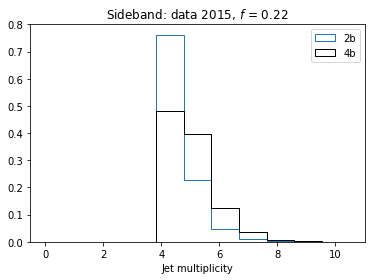

In [15]:
myRange=(0,10.5)
nBins=11

plt.hist(data15_SB.loc[data15_SB.ntag==2,'njets'],
         bins=nBins, range=myRange, label='2b',
         histtype="step", color='C0', density=True)
plt.hist(data15_SB.loc[data15_SB.ntag>=4,'njets'],
         bins=nBins, range=myRange, label='4b',
         histtype="step", color='k', density=True)

plt.legend()
plt.xlabel('Jet multiplicity')
plt.title('Sideband: data 2015, $f$ = 0.22')
plt.show()

Agh!!!!!!!! I'm not seeing *any* difference in these jet multiplicity distributions when I run with a different $f$... wtf is wrong??

**Conclusion:** There's definitely something that I'm not understanding about this, I'll ask Rafael tomorrow.

### Kinematics

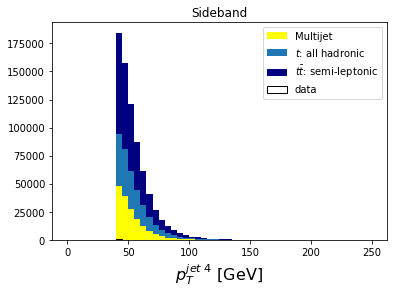

In [16]:
myRange=(0,250)
nBins=50

bkg_hists = [data15_SB.loc[data15_SB.ntag==2,'rwgt_pT_4'],
             tt_had_SB.loc[tt_had_SB.ntag==2,'rwgt_pT_4'],
             tt_lep_SB.loc[tt_lep_SB.ntag==2,'rwgt_pT_4']] 
labels = ['Multijet', '$t\bar{t}$: all hadronic', r'$t\bar{t}$: semi-leptonic']
colors = ["yellow", "C0", "navy"]
          
plt.hist(bkg_hists, bins=nBins, range=myRange, stacked=True,
         label=labels, color=colors)

plt.hist(data15_SB.loc[data15_SB.ntag==4,'rwgt_pT_4'],
         bins=nBins,range=myRange,
         label='data', histtype="step", color="k")

plt.legend()
plt.xlabel('$p_T^{jet\ 4}$ [GeV]',fontsize=16)
plt.title("Sideband")
plt.show()

Ok, this *does not match* right now.

**Ideas to try:**
- Am I using the right selection for the number of jets for ttbar?
- Should I have processed the ttbar with different $f$s?
- Are there other weights that I should be applying (like mc_sf)?
- Maybe I also should be running with the top veto turned off?
- I might also want to make sure that I'm reweighting to the correct $\mathcal{L}$

**Where to go from here**

Ok, so I invested some time trying to understand what Beojean is saving, but it seems that I'm not understanding how to get the background from the ttbar and data samples.

So to proceed with looking at the other variables, I think I'm just going to look at a signal sample, and come back and add the background in later after following up with some questions!!

Instead of looking at the variables in the full mass plane, I think I'm going to focus on the signal region for now.


**Plan:**
- For the signal, require 4 b-tags
- For the background, require 2 b-tags. To do this, I'll need to run in the unblinded mode, and just be careful not to look at the 3b or 4b data!

In [29]:
treeName = "sig"
df_sig = pd.DataFrame(root2array(sigDir + "M500_mv2_70.root", treeName, selection='ntag >= 4'))
df_sig.mc_sf *= (3.2 / 24)

In [30]:
df_bkg = pd.DataFrame(root2array(sigDir + "data_15.root", treeName, selection='ntag == 2'))

# Additionally, get the dataframe for the sideband, since we can normalize by 4b / 2b as a 0th order bkg est
qcd_SB = pd.DataFrame(root2array(sigDir + "data_15.root", "sideband"))

In [31]:
# SB: 4b to 2b normalization
N = (qcd_SB['ntag'] == 4).sum() / (qcd_SB['ntag'] == 2).sum() 
N

0.007268365389754217

In [32]:
df_bkg.mc_sf = N

## Event level quantities

So far, this is what Beojean has stored in the Ntuple:
- $m^{hh}$
- $p_T^{hh}$


In [33]:
evtVars = ['event_m_hh','event_pt_hh']
nBins = [100,100]
myRanges = [(0,1000),(0,1000)]

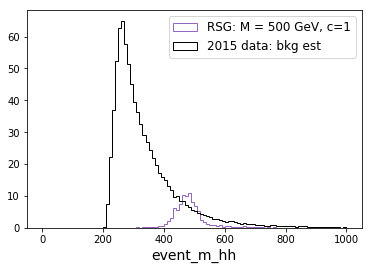

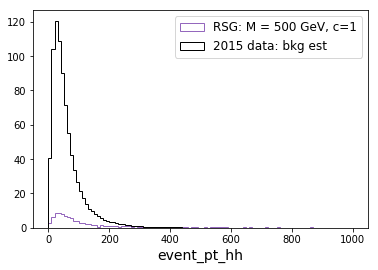

In [34]:
for e,n,r in zip(evtVars,nBins,myRanges):
    
    plt.figure()
    plt.hist(df_sig.loc[df_sig.ntag >= 4, e],
             weights=df_sig.loc[df_sig.ntag >= 4, 'mc_sf'],
             bins=n,range=r, #density=True,
             label='RSG: M = 500 GeV, c=1', 
             color='C4',histtype='step')
    plt.hist(df_bkg[e], weights=df_bkg.mc_sf,
             bins=n,range=r, # density=N,
             label='2015 data: bkg est', 
             color='k',histtype='step')
    
    plt.xlabel(e,fontsize=14)
    plt.legend(fontsize=12)
    
plt.show()

**Note:** What Beojean is storing in the Ntuple is the *unscaled* $m_{hh}$ value.

## HC quantities

What we have access to in the Ntuple already:
- $m^{h1,2}$
- $E^{h1,2}$
- $p_T^{h1,2}$
- $\eta^{h1,2}$
- $\phi^{h1,2}$


In [35]:
hcVars = ['event_m_h1', 'event_E_h1', 'event_pT_h1',
          'event_eta_h1', 'event_phi_h1', 
          'event_m_h2', 'event_E_h2', 'event_pT_h2', 
          'event_eta_h2', 'event_phi_h2']

nBins = [100,75,125,50,25]*2
myRanges = [(0,200),(0,1500),(0,750),(-2.5,2.5),(-np.pi,np.pi)]*2

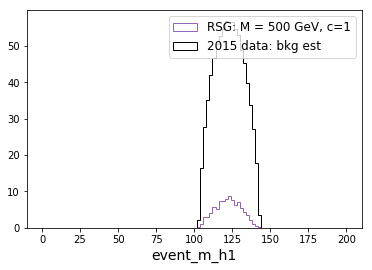

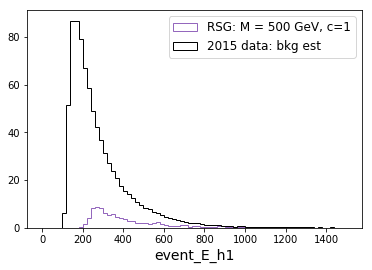

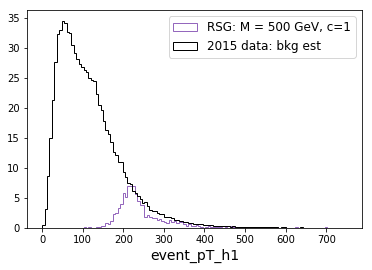

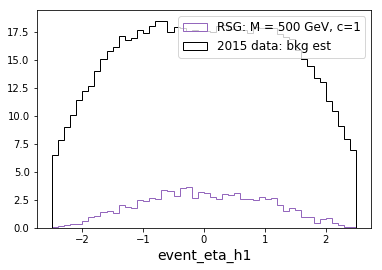

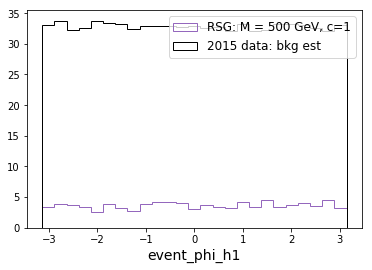

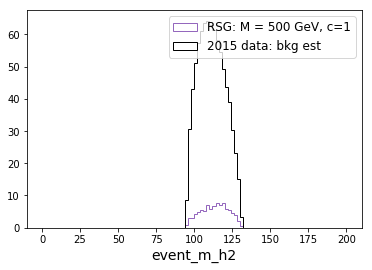

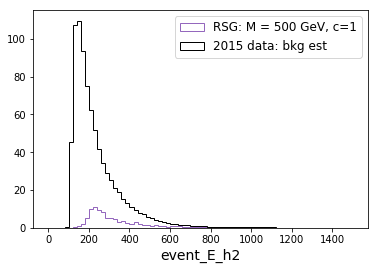

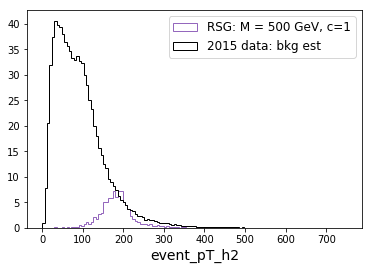

In [36]:
for e,n,r in zip(hcVars,nBins,myRanges):
    
    plt.figure()
    plt.hist(df_sig.loc[df_sig.ntag >= 4, e],
             weights=df_sig.loc[df_sig.ntag >= 4, 'mc_sf'],
             bins=n,range=r, #density=True,
             label='RSG: M = 500 GeV, c=1', 
             color='C4',histtype='step')
    
    plt.hist(df_bkg[e], weights=df_bkg.mc_sf,
             bins=n,range=r, #density=True,
             label='2015 data: bkg est', 
             color='k',histtype='step')
    
    
    plt.xlabel(e,fontsize=14)
    plt.legend(fontsize=12)
    
plt.show()

## Jet level quantities

What's in the Ntuple already:
- $m$
- $E$
- $p_T^{jet}$
- $\eta$
- $\phi$
- opening angle between the HC and the jet


In [37]:
jetVars = ['event_m_h1_j1', 'event_E_h1_j1', 'event_pT_h1_j1', 
           'event_eta_h1_j1', 'event_phi_h1_j1', 'event_angle_h1_j1', 
           'event_m_h1_j2', 'event_E_h1_j2', 'event_pT_h1_j2',
           'event_eta_h1_j2', 'event_phi_h1_j2', 'event_angle_h1_j2',
           'event_m_h2_j1', 'event_E_h2_j1', 'event_pT_h2_j1', 
           'event_eta_h2_j1', 'event_phi_h2_j1', 'event_angle_h2_j1', 
           'event_m_h2_j2', 'event_E_h2_j2', 'event_pT_h2_j2', 
           'event_eta_h2_j2', 'event_phi_h2_j2', 'event_angle_h2_j2']

nBins = [100,75,125,50,25,100]*4
myRanges = [(0,200),(0,1500),(0,750),(-2.5,2.5),(-np.pi,np.pi),(-np.pi,np.pi)]*4

/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc8-opt/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


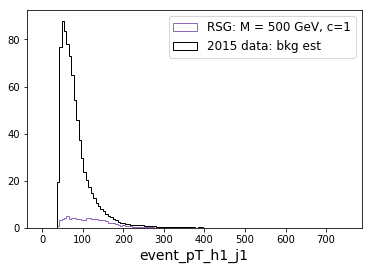

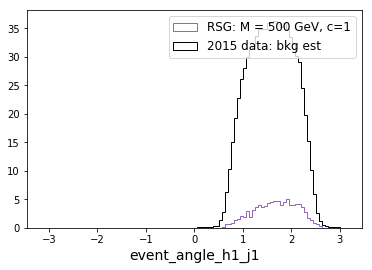

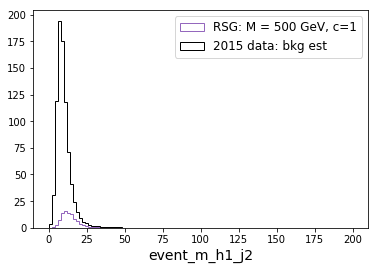

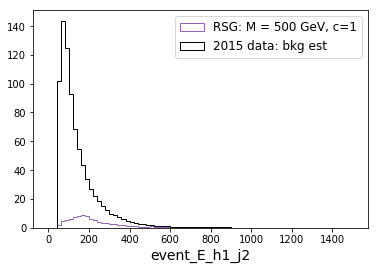

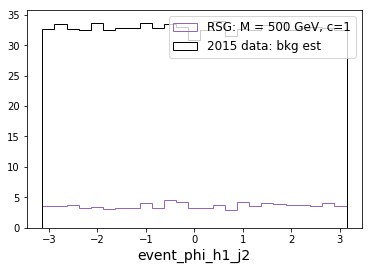

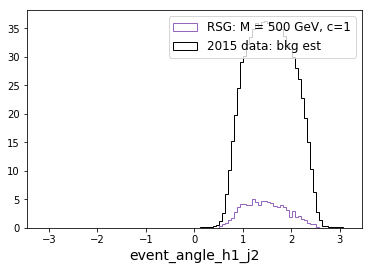

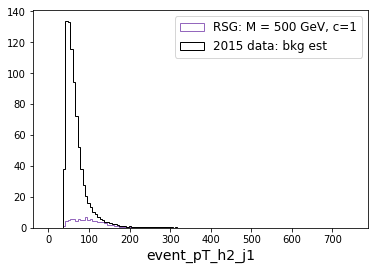

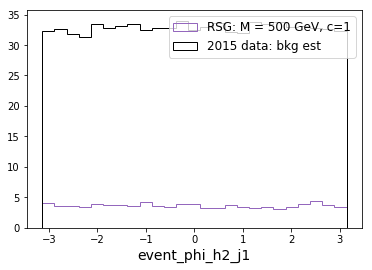

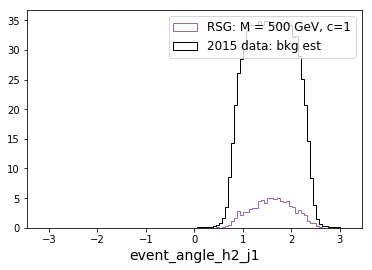

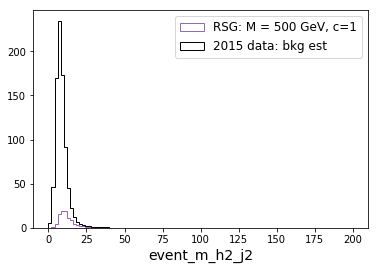

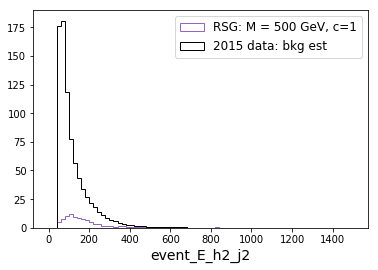

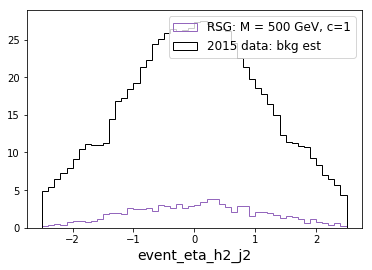

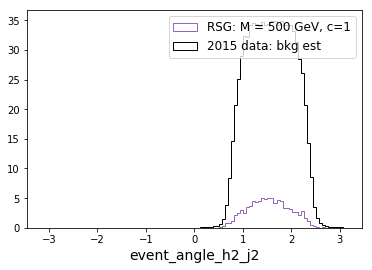

In [38]:
for e,n,r in zip(jetVars,nBins,myRanges):
    
    plt.figure()
    plt.hist(df_sig.loc[df_sig.ntag >= 4, e],
             weights=df_sig.loc[df_sig.ntag >= 4, 'mc_sf'],
             bins=n,range=r, #density=True,
             label='RSG: M = 500 GeV, c=1', 
             color='C4',histtype='step')
    
    plt.hist(df_bkg[e], weights=df_bkg.mc_sf,
             bins=n,range=r, #density=True,
             label='2015 data: bkg est', 
             color='k',histtype='step')
    
    plt.xlabel(e,fontsize=14)
    plt.legend(fontsize=12)
    
plt.show()

I was also kind of confused about this tag variable, but it looks like it's just saving whether or not a jet making up a HC has been tagged.

In [39]:
np.min(df_sig.event_tag_h1_j1),np.max(df_sig.event_tag_h1_j1)

(True, True)

In [40]:
np.min(df_bkg.event_tag_h1_j1),np.max(df_bkg.event_tag_h1_j1)

(False, True)